# Import Library

In [96]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')


# Load Datasets

In [97]:
datasets=pd.read_csv('Cleaned_Laptop_data.csv')
datasets.head()


,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
0,ASUS,Celeron,Intel,5,Missing,4.0,Cooling,0,1024,Windows,64,0,Casual,15.6,1,No,No,23990.0
1,ASUS,VivoBook,Intel,5,10th,4.0,DDR3,512,0,Windows,64,0,Casual,15.6,1,No,No,37990.0
2,ASUS,Vivobook,Intel,A6-9225 Processor,10th,4.0,DDR3,0,1024,Windows,64,0,Casual,14.1,1,No,No,NaN
3,HP,Core,Intel,APU Dual,11th,4.0,DDR3,512,0,Windows,64,0,ThinNlight,15.6,1,No,Yes,54990.0
4,HP,Core,Intel,APU Dual,11th,4.0,DDR3,512,0,Windows,64,0,ThinNlight,15.6,0,No,No,54990.0


# Data Cleaning

# The info() method prints information about the DataFrame.
    1.The information contains the number of columns
    2.Column labels,data types, memory usage, range index
    3.The number of cells in each column (non-null values). Note: the info() method actually prints the info.


In [98]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            845 non-null    object 
 1   model            845 non-null    object 
 2   processor_brand  845 non-null    object 
 3   processor_Name   845 non-null    object 
 4   processor_gnrtn  845 non-null    object 
 5   ram_gb           845 non-null    float64
 6   Apps             845 non-null    object 
 7   ssd              845 non-null    int64  
 8   hdd              845 non-null    int64  
 9   os               845 non-null    object 
 10  os_bit           845 non-null    int64  
 11  graphic_card_gb  845 non-null    int64  
 12  weight           845 non-null    object 
 13  display_size     845 non-null    object 
 14  warranty         845 non-null    int64  
 15  Touchscreen      845 non-null    object 
 16  msoffice         845 non-null    object 
 17  Price           

## Missing Value Check

In [99]:
datasets.isnull().sum()

brand              0
model              0
processor_brand    0
processor_Name     0
processor_gnrtn    0
ram_gb             0
Apps               0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
Price              3
dtype: int64

In [100]:
datasets[datasets['Price'].isnull()]

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
2,ASUS,Vivobook,Intel,A6-9225 Processor,10th,4.0,DDR3,0,1024,Windows,64,0,Casual,14.1,1,No,No,NaN
26,DELL,Inspiron,Intel,Celeron Dual,11th,4.0,DDR4,256,1024,Windows,64,0,Casual,15.6,0,No,No,NaN
64,HP,Pavilion,AMD,Core i3,Missing,4.0,DDR4,256,1024,Windows,64,4,Gaming,15.6,1,No,Yes,NaN


## Imputation of missing value

In [101]:
datasets[(datasets['brand']=='ASUS') & (datasets['model']=='Vivobook') 
   & (datasets['processor_brand']=='Intel') & (datasets['ram_gb']==4.0)& (datasets['hdd']==1024)].mean()['Price']

55990.0

In [102]:
datasets.loc[(datasets['brand']=='ASUS')& (datasets['Price'].isnull()), ['Price']]=55990.0

In [103]:
datasets[(datasets['brand']=='DELL') & (datasets['model']=='Inspiron') 
   & (datasets['processor_brand']=='Intel') & (datasets['ram_gb']==4.0)& (datasets['hdd']==1024)].mean()['Price']

42490.0

In [104]:
datasets.loc[(datasets['brand']=='DELL')& (datasets['Price'].isnull()), ['Price']]=42490.0

In [105]:
datasets[(datasets['brand']=='HP') & (datasets['model']=='Pavilion') 
   & (datasets['processor_brand']=='AMD') & (datasets['ram_gb']==4.0)].mean()['Price']

57990.0

In [106]:
datasets.loc[(datasets['brand']=='HP')& (datasets['Price'].isnull()), ['Price']]=57990.0

In [107]:
datasets[datasets['Price'].isnull()]

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price


In [108]:
datasets.isnull().sum()

brand              0
model              0
processor_brand    0
processor_Name     0
processor_gnrtn    0
ram_gb             0
Apps               0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
Price              0
dtype: int64

### Find duplicate rows in a Dataframe based on all or selected columns
#### Dataframe.duplicated() method of Pandas.
 

In [109]:
datasets[datasets.duplicated()]

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
85,ASUS,VivoBook,AMD,Core i3,Missing,4.0,DDR4,256,1024,Windows,64,0,Casual,15.6,1,No,No,54990.0
94,ASUS,VivoBook,Intel,Core i3,11th,4.0,DDR4,512,0,Windows,64,0,Casual,14,1,No,No,42990.0
276,ASUS,VivoBook,Intel,Core i5,11th,8.0,DDR4,512,0,Windows,64,0,Casual,14,1,No,No,59990.0
278,HP,Pavilion,Intel,Core i5,11th,8.0,DDR4,512,0,Windows,64,0,ThinNlight,15.6,1,No,Yes,63990.0
296,APPLE,2021,Apple,Core i5,Missing,8.0,DDR4,1024,0,Mac,64,0,Casual,14.2,1,No,No,225990.0
313,ASUS,Pentium,Intel,Core i5,Missing,8.0,DDR4,0,1024,Windows,64,0,Casual,15.6,1,No,No,25990.0
336,APPLE,MacBook,Intel,Core i5,10th,8.0,DDR4,1024,0,Mac,64,0,Casual,13,1,No,No,179990.0
389,ASUS,VivoBook,AMD,Core i5,Missing,8.0,DDR4,512,0,Windows,64,0,Casual,14,1,No,No,58990.0
830,Avita,Liber,Intel,Ryzen 9,7th,16.0,LPDDR4X,512,0,Windows,64,0,ThinNlight,13.3,0,No,No,65556.0


In [110]:
datasets.loc[datasets.duplicated(keep='first')]

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
85,ASUS,VivoBook,AMD,Core i3,Missing,4.0,DDR4,256,1024,Windows,64,0,Casual,15.6,1,No,No,54990.0
94,ASUS,VivoBook,Intel,Core i3,11th,4.0,DDR4,512,0,Windows,64,0,Casual,14,1,No,No,42990.0
276,ASUS,VivoBook,Intel,Core i5,11th,8.0,DDR4,512,0,Windows,64,0,Casual,14,1,No,No,59990.0
278,HP,Pavilion,Intel,Core i5,11th,8.0,DDR4,512,0,Windows,64,0,ThinNlight,15.6,1,No,Yes,63990.0
296,APPLE,2021,Apple,Core i5,Missing,8.0,DDR4,1024,0,Mac,64,0,Casual,14.2,1,No,No,225990.0
313,ASUS,Pentium,Intel,Core i5,Missing,8.0,DDR4,0,1024,Windows,64,0,Casual,15.6,1,No,No,25990.0
336,APPLE,MacBook,Intel,Core i5,10th,8.0,DDR4,1024,0,Mac,64,0,Casual,13,1,No,No,179990.0
389,ASUS,VivoBook,AMD,Core i5,Missing,8.0,DDR4,512,0,Windows,64,0,Casual,14,1,No,No,58990.0
830,Avita,Liber,Intel,Ryzen 9,7th,16.0,LPDDR4X,512,0,Windows,64,0,ThinNlight,13.3,0,No,No,65556.0


In [111]:
datasets.drop_duplicates(keep='first', inplace=True)

In [112]:
datasets.shape

(836, 18)

# Data Visualization

In [113]:
import seaborn as sns

<AxesSubplot:xlabel='Price', ylabel='Density'>

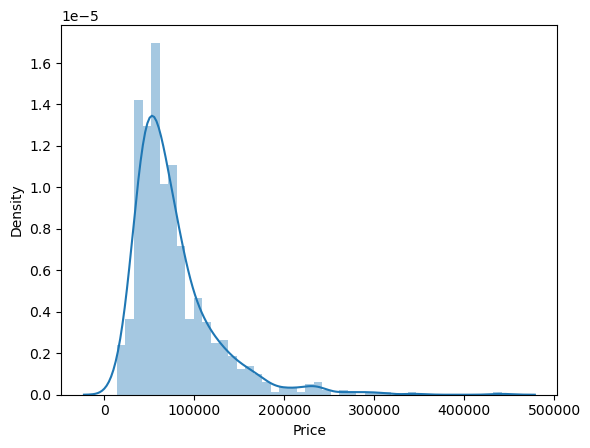

In [114]:
sns.distplot(datasets['Price'])

<AxesSubplot:>

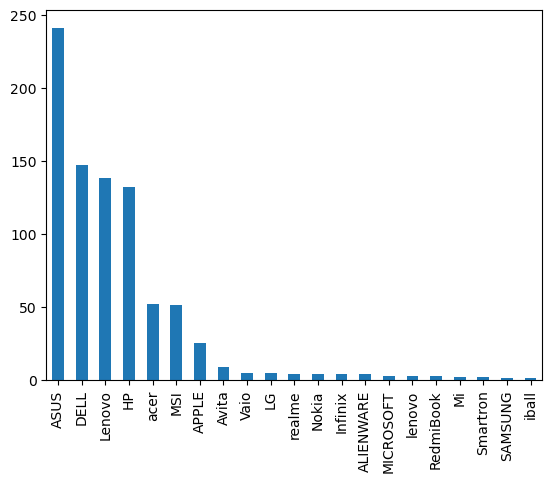

In [115]:
datasets['brand'].value_counts().plot(kind='bar')

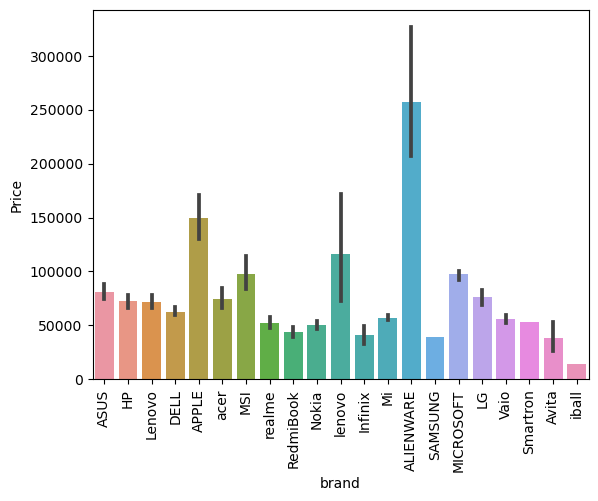

In [117]:
sns.barplot(x=datasets['brand'],y=datasets['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

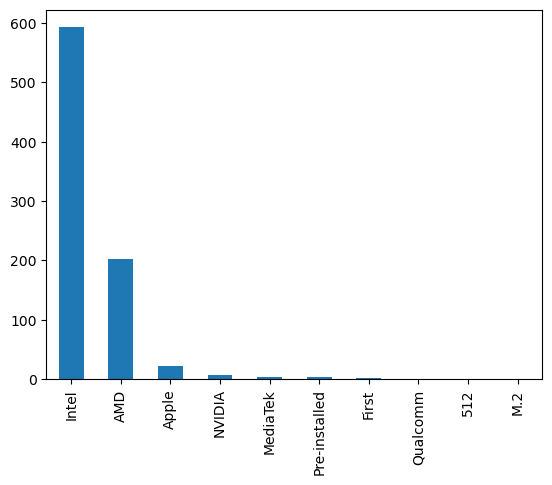

In [118]:
datasets['processor_brand'].value_counts().plot(kind='bar')

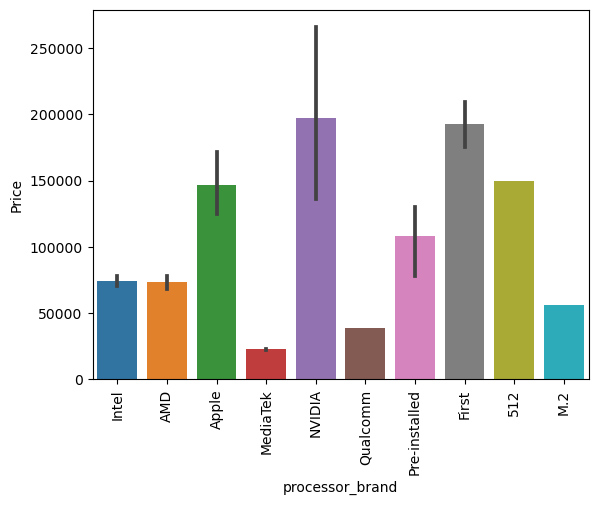

In [119]:
sns.barplot(x=datasets['processor_brand'],y=datasets['Price'])
plt.xticks(rotation='vertical')
plt.show()

## Correlation of Price with others

In [120]:
datasets.corr()['Price']

ram_gb             0.128258
ssd                0.524946
hdd               -0.211992
os_bit            -0.069523
graphic_card_gb    0.482795
warranty           0.026203
Price              1.000000
Name: Price, dtype: float64

In [121]:
datasets.corr()

,ram_gb,ssd,hdd,os_bit,graphic_card_gb,warranty,Price
ram_gb,1.000000,-0.011520,0.039400,-0.080787,-0.013778,-0.146090,0.128258
ssd,-0.011520,1.000000,-0.437870,0.230409,0.269102,0.186146,0.524946
hdd,0.039400,-0.437870,1.000000,0.000355,-0.067018,-0.025742,-0.211992
os_bit,-0.080787,0.230409,0.000355,1.000000,-0.147358,0.287461,-0.069523
graphic_card_gb,-0.013778,0.269102,-0.067018,-0.147358,1.000000,-0.060307,0.482795
warranty,-0.146090,0.186146,-0.025742,0.287461,-0.060307,1.000000,0.026203
Price,0.128258,0.524946,-0.211992,-0.069523,0.482795,0.026203,1.000000


<AxesSubplot:>

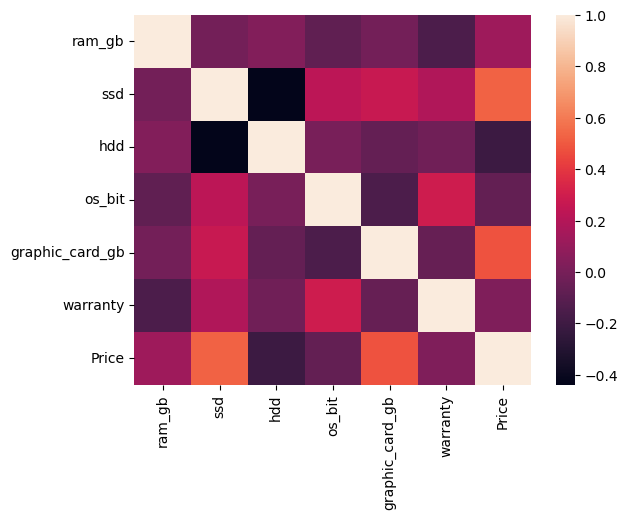

In [122]:
sns.heatmap(datasets.corr())

# Feature Engineering

In [39]:
object_col_dict={colname:len(datasets[colname].unique()) for colname in datasets.select_dtypes(["category", "object"])}
list_of_tuple=sorted(object_col_dict.items(),key=lambda x:x[1])  
list_of_tuple

[('Touchscreen', 2),
 ('msoffice', 2),
 ('os', 3),
 ('weight', 3),
 ('processor_gnrtn', 8),
 ('processor_brand', 10),
 ('Apps', 14),
 ('brand', 21),
 ('display_size', 22),
 ('processor_Name', 34),
 ('model', 116)]

## Level Encoding for categorical column which unique label count  is 2


In [40]:
for tuple in list_of_tuple[:2]:
    print(tuple[0])

Touchscreen
msoffice


In [41]:
for tuple in list_of_tuple[:2]:
    datasets[tuple[0]], _ = datasets[tuple[0]].factorize() 
datasets.head()

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
0,ASUS,Celeron,Intel,5,Missing,4.0,Cooling,0,1024,Windows,64,0,Casual,15.6,1,0,0,23990.0
1,ASUS,VivoBook,Intel,5,10th,4.0,DDR3,512,0,Windows,64,0,Casual,15.6,1,0,0,37990.0
2,ASUS,Vivobook,Intel,A6-9225 Processor,10th,4.0,DDR3,0,1024,Windows,64,0,Casual,14.1,1,0,0,55990.0
3,HP,Core,Intel,APU Dual,11th,4.0,DDR3,512,0,Windows,64,0,ThinNlight,15.6,1,0,1,54990.0
4,HP,Core,Intel,APU Dual,11th,4.0,DDR3,512,0,Windows,64,0,ThinNlight,15.6,0,0,0,54990.0


## Model column has 116 Labels
#### 1.Need to count frequency for every label
#### 2.Replace the frequency with label

In [42]:
list_of_tuple

[('Touchscreen', 2),
 ('msoffice', 2),
 ('os', 3),
 ('weight', 3),
 ('processor_gnrtn', 8),
 ('processor_brand', 10),
 ('Apps', 14),
 ('brand', 21),
 ('display_size', 22),
 ('processor_Name', 34),
 ('model', 116)]

In [43]:
model_map=datasets['model'].value_counts().to_dict()
model_map

{'Core': 87,
 'Inspiron': 74,
 'VivoBook': 45,
 'Vivobook': 37,
 'IdeaPad': 35,
 'Ryzen': 34,
 'Vostro': 33,
 'Pavilion': 33,
 'Ideapad': 30,
 'ROG': 30,
 'Aspire': 23,
 'ZenBook': 21,
 'ExpertBook': 15,
 'Yoga': 14,
 'ASUS': 13,
 'MacBook': 12,
 'Spectre': 12,
 '15s': 12,
 'Chromebook': 11,
 'Legion': 11,
 'ThinkPad': 10,
 'TUF': 10,
 'Modern': 10,
 'Predator': 9,
 '2020': 8,
 'Zenbook': 7,
 'Swift': 6,
 'Envy': 6,
 'Nitro': 5,
 '2021': 5,
 'Gram': 5,
 'OMEN': 5,
 'XPS': 5,
 'Prestige': 5,
 'Zephyrus': 5,
 'HP': 5,
 '14s': 5,
 'GF63': 5,
 'Pro': 4,
 'Intel': 4,
 'E': 4,
 'Liber': 4,
 'Pentium': 4,
 'PURA': 4,
 'Katana': 4,
 'Thinkbook': 4,
 'PureBook': 4,
 'EeeBook': 4,
 'ThinkBook': 3,
 '15': 3,
 'G15': 3,
 'INBook': 3,
 'Notebook': 3,
 'Surface': 3,
 'APU': 3,
 'Pulse': 3,
 'DELL': 2,
 'Sword': 2,
 'INSPIRON': 2,
 'Omen': 2,
 't.book': 2,
 'Stealth': 2,
 'Celeron': 2,
 '15q': 2,
 'G5': 2,
 'GF65': 2,
 'Book': 2,
 'Book(Slim)': 2,
 'x360': 2,
 'Travelmate': 2,
 'WF65': 1,
 'F17': 1,


In [44]:
datasets['model']=datasets['model'].map(model_map)
datasets.head()

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
0,ASUS,2,Intel,5,Missing,4.0,Cooling,0,1024,Windows,64,0,Casual,15.6,1,0,0,23990.0
1,ASUS,45,Intel,5,10th,4.0,DDR3,512,0,Windows,64,0,Casual,15.6,1,0,0,37990.0
2,ASUS,37,Intel,A6-9225 Processor,10th,4.0,DDR3,0,1024,Windows,64,0,Casual,14.1,1,0,0,55990.0
3,HP,87,Intel,APU Dual,11th,4.0,DDR3,512,0,Windows,64,0,ThinNlight,15.6,1,0,1,54990.0
4,HP,87,Intel,APU Dual,11th,4.0,DDR3,512,0,Windows,64,0,ThinNlight,15.6,0,0,0,54990.0


# Target Guided Ordering Encoding
#### 1.Ordering the labels according to the target
#### 2.Replace the labels by the joint probability of being 1 or 0

In [13]:
#datasets.groupby(['processor_brand'])['Price'].mean()

processor_brand
512              149990.000000
AMD               73207.901961
Apple            150033.478261
First            192440.000000
Intel             74278.790620
M.2               55990.000000
MediaTek          22823.333333
NVIDIA           197277.142857
Pre-installed    108176.333333
Qualcomm          38990.000000
Name: Price, dtype: float64

In [14]:
#datasets.groupby(['processor_brand'])['Price'].mean().sort_values()

processor_brand
MediaTek          22823.333333
Qualcomm          38990.000000
M.2               55990.000000
AMD               73207.901961
Intel             74278.790620
Pre-installed    108176.333333
512              149990.000000
Apple            150033.478261
First            192440.000000
NVIDIA           197277.142857
Name: Price, dtype: float64

In [15]:
#datasets.groupby(['processor_brand'])['Price'].mean().sort_values().index

Index(['MediaTek', 'Qualcomm', 'M.2', 'AMD', 'Intel', 'Pre-installed', '512',
       'Apple', 'First', 'NVIDIA'],
      dtype='object', name='processor_brand')

In [16]:
#ordinal_labels=datasets.groupby(['processor_brand'])['Price'].mean().sort_values().index
#ordinal_labels

Index(['MediaTek', 'Qualcomm', 'M.2', 'AMD', 'Intel', 'Pre-installed', '512',
       'Apple', 'First', 'NVIDIA'],
      dtype='object', name='processor_brand')

In [17]:
#ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
#ordinal_labels2

{'MediaTek': 0,
 'Qualcomm': 1,
 'M.2': 2,
 'AMD': 3,
 'Intel': 4,
 'Pre-installed': 5,
 '512': 6,
 'Apple': 7,
 'First': 8,
 'NVIDIA': 9}

In [18]:
#datasets['processor_brand']=datasets['processor_brand'].map(ordinal_labels2)
#datasets.head()

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
0,ASUS,2,4,5,Missing,4.0,Cooling,0,1024,0,64,0,0,15.6,1,0,0,23990.0
1,ASUS,49,4,5,10th,4.0,DDR3,512,0,0,64,0,0,15.6,1,0,0,37990.0
3,HP,87,4,APU Dual,11th,4.0,DDR3,512,0,0,64,0,1,15.6,1,0,1,54990.0
4,HP,87,4,APU Dual,11th,4.0,DDR3,512,0,0,64,0,1,15.6,0,0,0,54990.0
5,Lenovo,35,4,APU Dual,10th,4.0,DDR3,0,1024,0,64,0,1,15.6,1,0,1,35990.0


## Above all process for ordinal Encoding are implementing below through simple method def ordinal_encode()

# Simple method create for Ordinal Encoding
#### 1- groupby on ordinal categorical type column
#### 2- Mean value of Price column
#### 3- Sort the values
#### 4- indexing
#### 5-Maling a dictionary by using enumerate() Methode
#### 6-Replace as labels

In [45]:
def ordinal_encode(df,ordi_col):
    ordinal_label=df.groupby([ordi_col])['Price'].mean().sort_values().index
    ordinal_label2={k:i for i,k in enumerate(ordinal_label,0)}
    df[ordi_col]=df[ordi_col].map(ordinal_label2)
    return df

In [46]:
for tuple in list_of_tuple[2:7]:
    print(tuple)

('os', 3)
('weight', 3)
('processor_gnrtn', 8)
('processor_brand', 10)
('Apps', 14)


In [47]:
for tuple in list_of_tuple[2:7]:
    ordinal_encode(datasets,tuple[0])
datasets.head()   

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
0,ASUS,2,4,5,4,4.0,0,0,1024,0,64,0,2,15.6,1,0,0,23990.0
1,ASUS,45,4,5,3,4.0,1,512,0,0,64,0,2,15.6,1,0,0,37990.0
2,ASUS,37,4,A6-9225 Processor,3,4.0,1,0,1024,0,64,0,2,14.1,1,0,0,55990.0
3,HP,87,4,APU Dual,2,4.0,1,512,0,0,64,0,0,15.6,1,0,1,54990.0
4,HP,87,4,APU Dual,2,4.0,1,512,0,0,64,0,0,15.6,0,0,0,54990.0


## One Hot Encoding

In [48]:
for tuple in list_of_tuple[7:-1]:
    print(tuple)

('brand', 21)
('display_size', 22)
('processor_Name', 34)


In [49]:
def one_hot_top_x(df,column):
    top_x_labels=df[column].value_counts().sort_values(ascending=False).head(10).index
    print(top_x_labels)
    for label in top_x_labels:
        df[column+'_'+label]=np.where(df[column]==label,1,0)
    df.drop([column],axis=1,inplace=True)
    

In [50]:
for tuple in list_of_tuple[7:-1]:
    print(tuple[0])
    one_hot_top_x(datasets,tuple[0])
datasets.head()

brand
Index(['ASUS', 'DELL', 'Lenovo', 'HP', 'acer', 'MSI', 'APPLE', 'Avita', 'Vaio',
       'LG'],
      dtype='object')
display_size
Index(['15.6', '14', '13.3', '0', '17.3', '14.96', '16', '14.1', '16.1',
       '13.4'],
      dtype='object')
processor_Name
Index(['Core i5', 'Core i3', 'Core i7', 'Ryzen 5', 'Ryzen 7', 'Ryzen 9',
       'Ryzen 3', 'Celeron Dual', 'M1 Processor', 'Pentium Quad'],
      dtype='object')


,model,processor_brand,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,...,processor_Name_Core i5,processor_Name_Core i3,processor_Name_Core i7,processor_Name_Ryzen 5,processor_Name_Ryzen 7,processor_Name_Ryzen 9,processor_Name_Ryzen 3,processor_Name_Celeron Dual,processor_Name_M1 Processor,processor_Name_Pentium Quad
0,2,4,4,4.0,0,0,1024,0,64,0,...,0,0,0,0,0,0,0,0,0,0
1,45,4,3,4.0,1,512,0,0,64,0,...,0,0,0,0,0,0,0,0,0,0
2,37,4,3,4.0,1,0,1024,0,64,0,...,0,0,0,0,0,0,0,0,0,0
3,87,4,2,4.0,1,512,0,0,64,0,...,0,0,0,0,0,0,0,0,0,0
4,87,4,2,4.0,1,512,0,0,64,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 844
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   model                        836 non-null    int64  
 1   processor_brand              836 non-null    int64  
 2   processor_gnrtn              836 non-null    int64  
 3   ram_gb                       836 non-null    float64
 4   Apps                         836 non-null    int64  
 5   ssd                          836 non-null    int64  
 6   hdd                          836 non-null    int64  
 7   os                           836 non-null    int64  
 8   os_bit                       836 non-null    int64  
 9   graphic_card_gb              836 non-null    int64  
 10  weight                       836 non-null    int64  
 11  warranty                     836 non-null    int64  
 12  Touchscreen                  836 non-null    int64  
 13  msoffice            

# Normalization and Standardization

## Standardization
#### Standardization means centering varible at zero
#### z=(x-x_mean)/std

#### Standardization:StandardScaler used from sklearn Library

In [52]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(datasets)
df_scaled= pd.DataFrame(df_scaled, columns =datasets.columns)
df_scaled

,model,processor_brand,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,...,processor_Name_Core i5,processor_Name_Core i3,processor_Name_Core i7,processor_Name_Ryzen 5,processor_Name_Ryzen 7,processor_Name_Ryzen 9,processor_Name_Ryzen 3,processor_Name_Celeron Dual,processor_Name_M1 Processor,processor_Name_Pentium Quad
0,-1.060901,0.187002,0.942913,-1.409617,-5.729904,-1.408143,2.206056,-0.323597,0.415344,-0.596657,...,-0.6869,-0.478969,-0.374858,-0.329778,-0.270501,-0.175574,-0.17192,-0.156556,-0.144073,-0.125682
1,0.495087,0.187002,-0.036311,-1.409617,-4.881781,0.217694,-0.455218,-0.323597,0.415344,-0.596657,...,-0.6869,-0.478969,-0.374858,-0.329778,-0.270501,-0.175574,-0.17192,-0.156556,-0.144073,-0.125682
2,0.205601,0.187002,-0.036311,-1.409617,-4.881781,-1.408143,2.206056,-0.323597,0.415344,-0.596657,...,-0.6869,-0.478969,-0.374858,-0.329778,-0.270501,-0.175574,-0.17192,-0.156556,-0.144073,-0.125682
3,2.014890,0.187002,-1.015535,-1.409617,-4.881781,0.217694,-0.455218,-0.323597,0.415344,-0.596657,...,-0.6869,-0.478969,-0.374858,-0.329778,-0.270501,-0.175574,-0.17192,-0.156556,-0.144073,-0.125682
4,2.014890,0.187002,-1.015535,-1.409617,-4.881781,0.217694,-0.455218,-0.323597,0.415344,-0.596657,...,-0.6869,-0.478969,-0.374858,-0.329778,-0.270501,-0.175574,-0.17192,-0.156556,-0.144073,-0.125682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,1.544475,-1.043972,0.942913,1.510566,-3.185535,0.217694,-0.455218,-0.323597,0.415344,-0.596657,...,-0.6869,-0.478969,-0.374858,-0.329778,-0.270501,5.695612,-0.17192,-0.156556,-0.144073,-0.125682
832,0.060858,-1.043972,0.942913,1.510566,-3.185535,0.217694,-0.455218,-0.323597,0.415344,1.321824,...,-0.6869,-0.478969,-0.374858,-0.329778,-0.270501,5.695612,-0.17192,-0.156556,-0.144073,-0.125682
833,-0.988530,0.187002,0.942913,1.510566,-3.185535,-1.408143,-0.455218,-0.323597,0.415344,-0.596657,...,-0.6869,-0.478969,-0.374858,-0.329778,-0.270501,5.695612,-0.17192,-0.156556,-0.144073,-0.125682
834,0.060858,-1.043972,0.942913,1.510566,-3.185535,0.217694,-0.455218,-0.323597,0.415344,0.362584,...,-0.6869,-0.478969,-0.374858,-0.329778,-0.270501,-0.175574,-0.17192,-0.156556,-0.144073,-0.125682


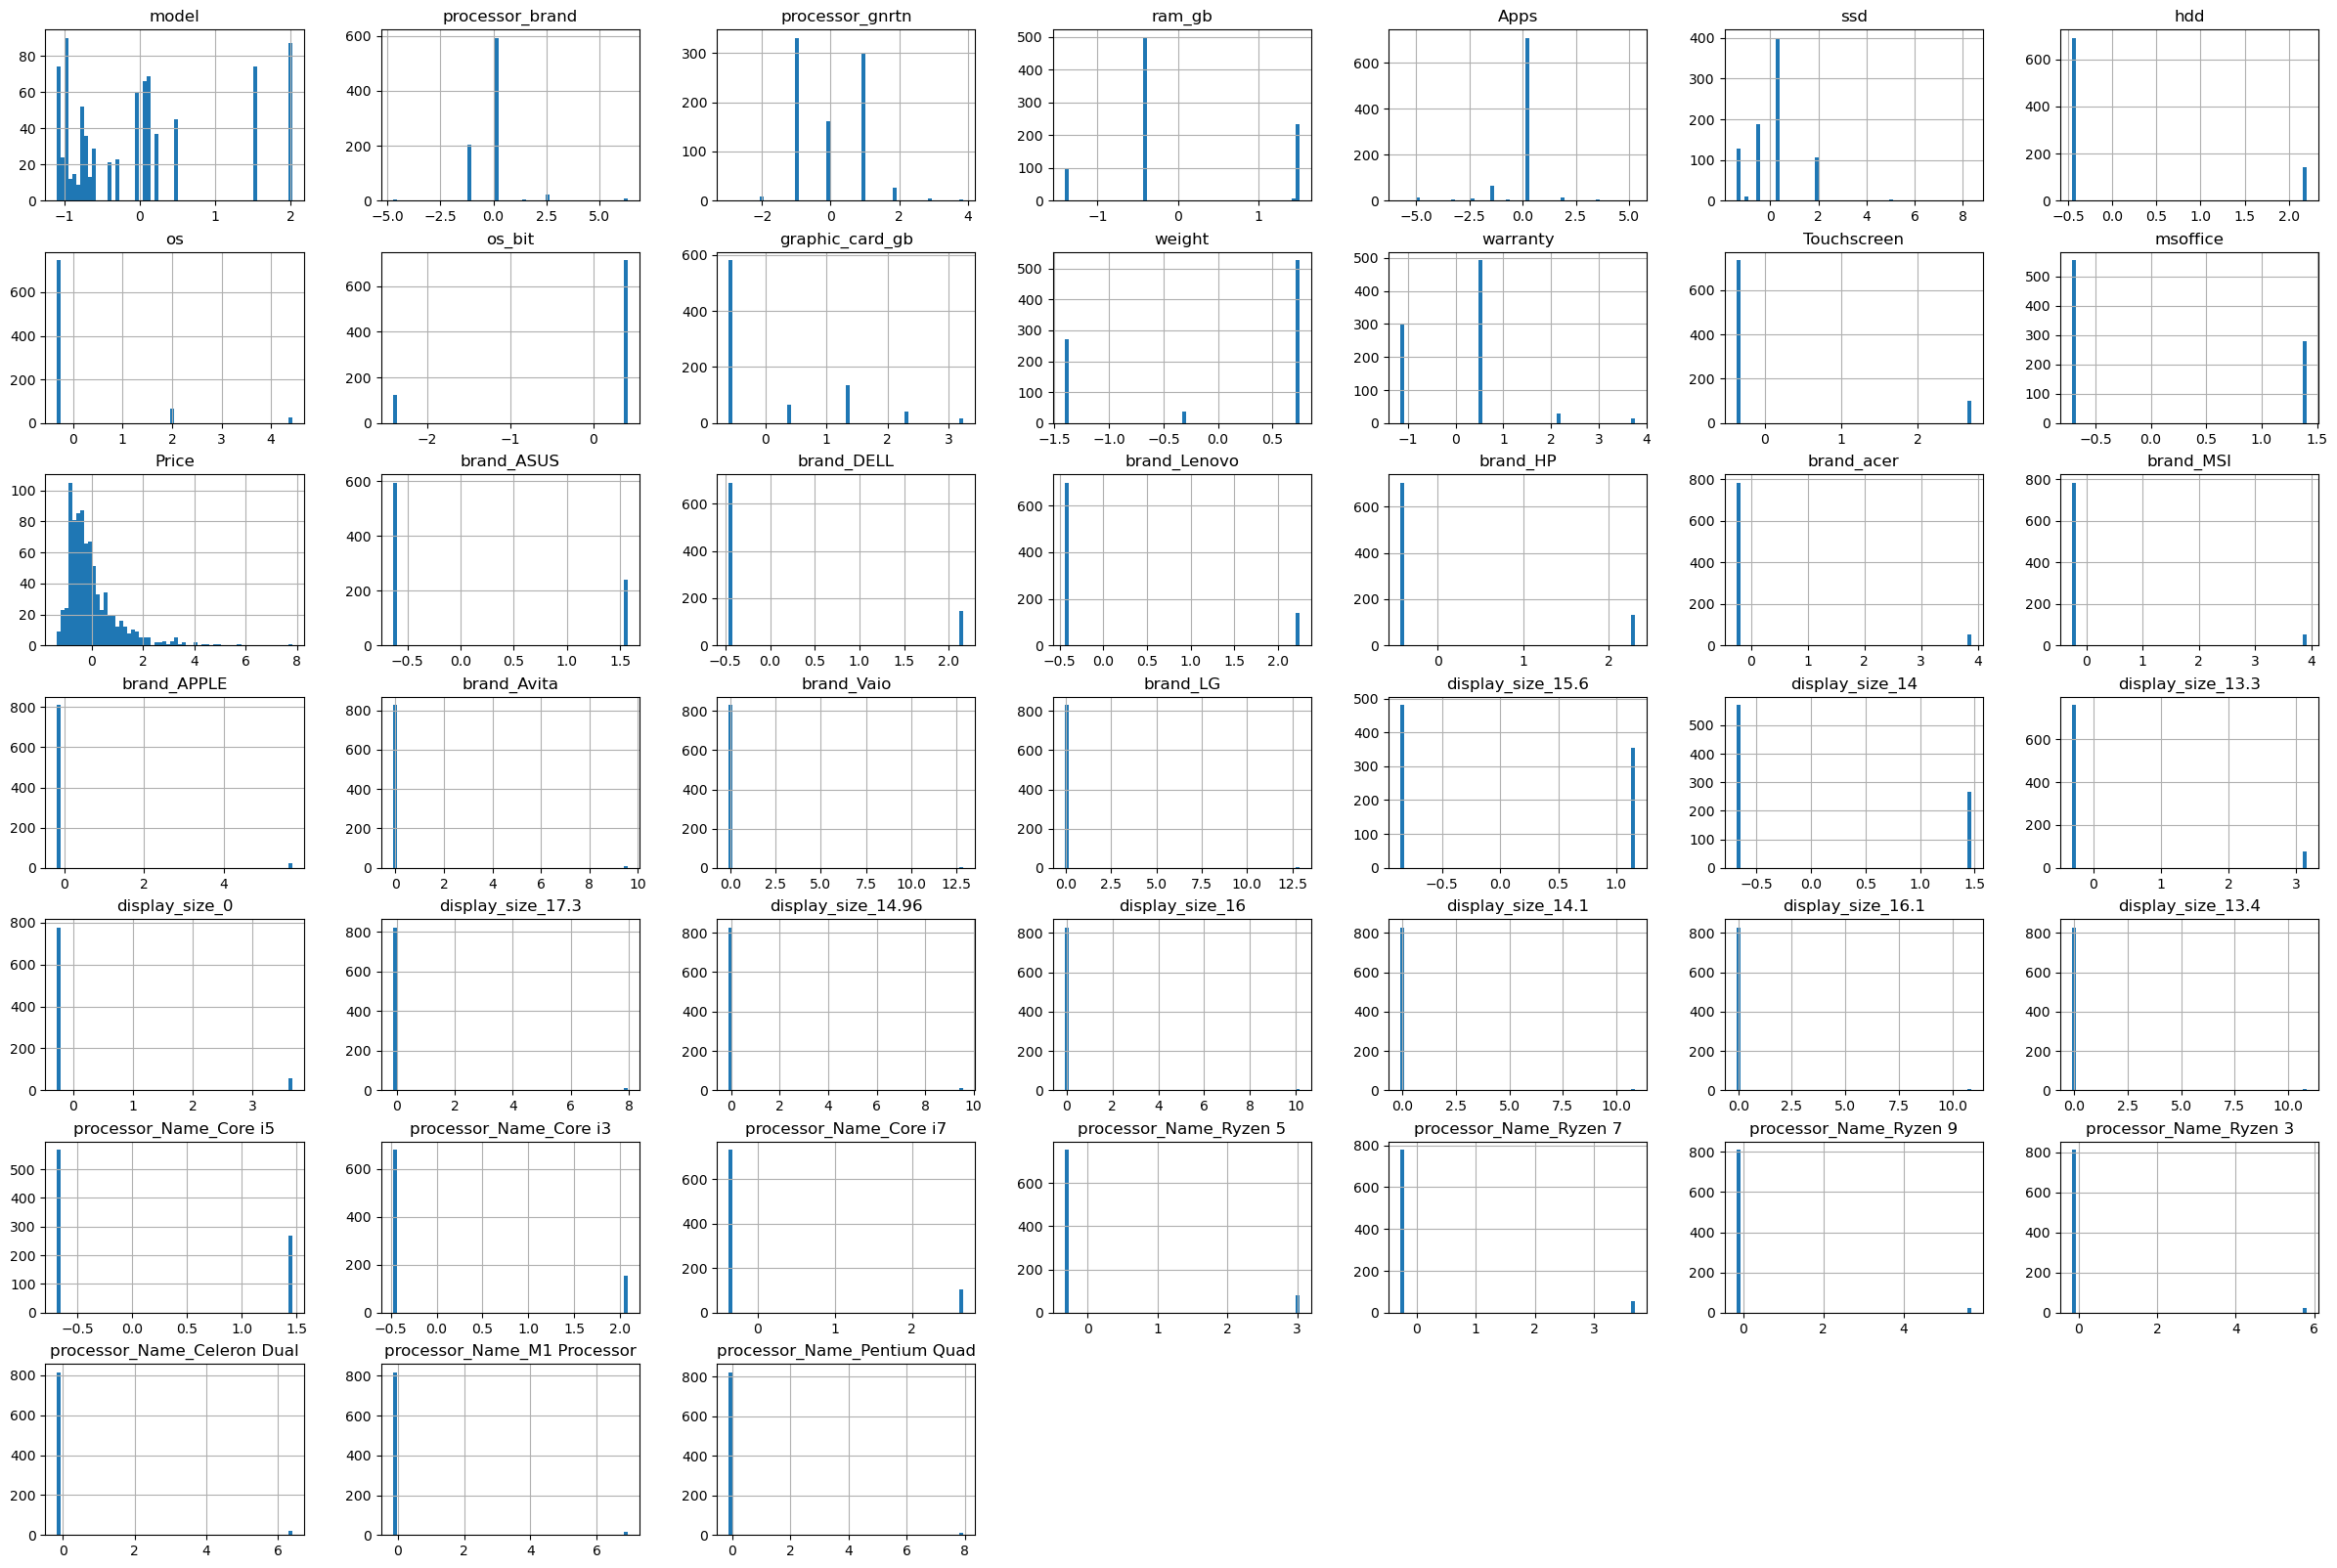

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
df_scaled.hist(bins=60,figsize=(30,20))
plt.show()

## Normalization

#### Normalization refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling. 
#### z=(x-x_min)/(x_max-x_min)

In [54]:
min_max_scaler=MinMaxScaler()
df_minMaxScaled=min_max_scaler.fit_transform(datasets)
df_minMaxScaled= pd.DataFrame(df_minMaxScaled, columns =datasets.columns)
df_minMaxScaled

,model,processor_brand,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,...,processor_Name_Core i5,processor_Name_Core i3,processor_Name_Core i7,processor_Name_Ryzen 5,processor_Name_Ryzen 7,processor_Name_Ryzen 9,processor_Name_Ryzen 3,processor_Name_Celeron Dual,processor_Name_M1 Processor,processor_Name_Pentium Quad
0,0.011628,0.444444,0.571429,0.0,0.000000,0.000000,1.0,0.0,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.511628,0.444444,0.428571,0.0,0.076923,0.166667,0.0,0.0,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.418605,0.444444,0.428571,0.0,0.076923,0.000000,1.0,0.0,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.444444,0.285714,0.0,0.076923,0.166667,0.0,0.0,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.444444,0.285714,0.0,0.076923,0.166667,0.0,0.0,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,0.848837,0.333333,0.571429,1.0,0.230769,0.166667,0.0,0.0,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
832,0.372093,0.333333,0.571429,1.0,0.230769,0.166667,0.0,0.0,1.0,0.50,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
833,0.034884,0.444444,0.571429,1.0,0.230769,0.000000,0.0,0.0,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
834,0.372093,0.333333,0.571429,1.0,0.230769,0.166667,0.0,0.0,1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


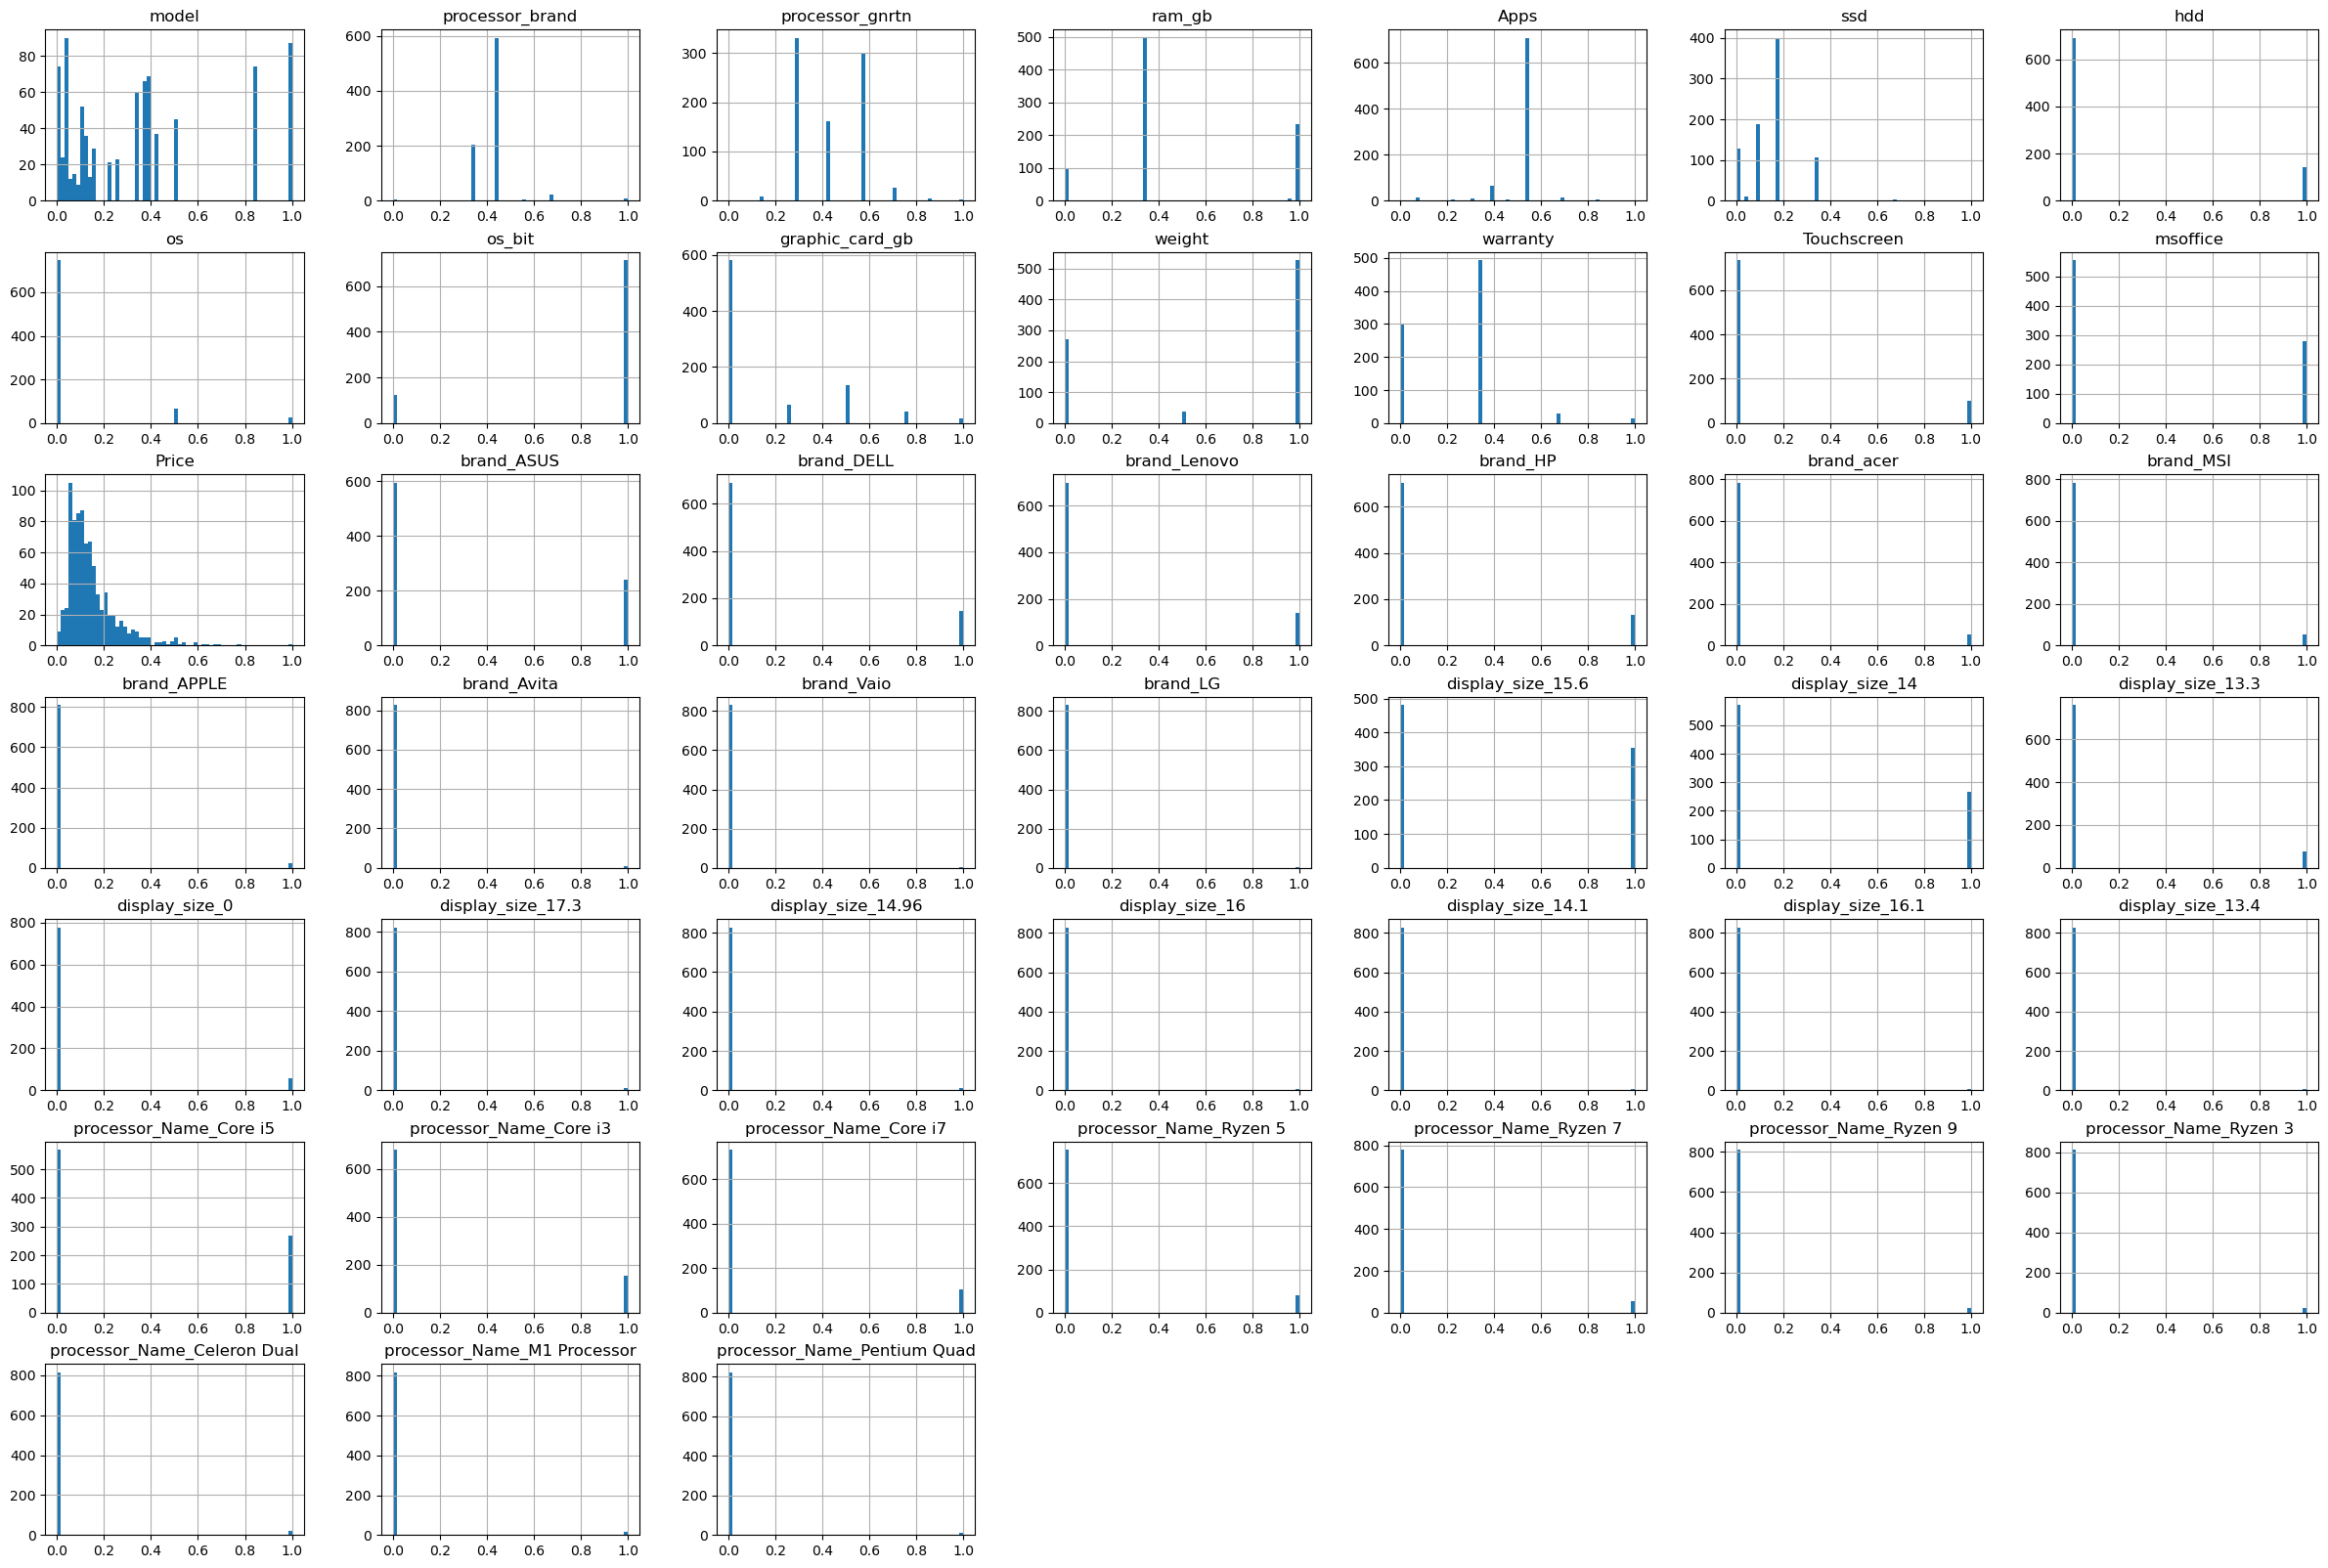

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
df_minMaxScaled.hist(bins=60,figsize=(30,20))
plt.show()

In [56]:
X=df_minMaxScaled.drop(['Price'],axis=1)
X.shape

(836, 44)

In [57]:
y=df_minMaxScaled.pop('Price')
y.shape

(836,)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=1,test_size=0.20)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(668, 44) (168, 44)
(668,) (168,)


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [61]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [62]:
model.coef_

array([ 1.54617185e-02,  2.97686769e-01,  9.74565757e-02,  3.30386391e-02,
        3.28780061e-02,  6.61394204e-01,  5.40279729e-02,  3.78137337e-02,
       -2.15243121e-02,  1.35939986e-01, -8.21151999e-03,  2.10259151e-02,
        4.48196017e-02, -8.63664328e-03, -2.33214450e-02, -2.24824905e-02,
       -1.59373784e-02, -1.71530970e-02, -2.21750686e-02,  6.27965868e-04,
        4.89726334e-02, -5.26499401e-02, -3.12479805e-02,  5.00901475e-02,
       -7.33388922e-02, -5.71272379e-02, -3.50206567e-02,  1.89433308e-02,
       -5.77757654e-02, -6.17834355e-02, -3.23158726e-02, -7.27990970e-02,
       -8.49940891e-02, -1.29554291e-01, -1.03529606e-02, -2.46940186e-02,
        1.83100341e-04, -2.12783331e-04, -2.34531904e-02, -2.48651310e-02,
       -2.18200720e-02, -2.72117682e-02, -2.78292477e-02,  3.75962244e-02])

In [63]:
model.intercept_

-0.09027656954669255

In [75]:
y_pred=model.predict(X_test).flatten()
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,0.075502
1,0.148592
2,0.097972
3,0.194266
4,0.467477
...,...
163,0.173693
164,0.088863
165,0.110931
166,0.137591


In [77]:
model.score(X_test,y_test)

0.6466481603497529

In [78]:
from sklearn.model_selection import cross_val_score
cvmodel=cross_val_score(LinearRegression(), X, y,cv=5)
cvmodel

array([0.16685458, 0.59911718, 0.6014888 , 0.70122103, 0.44082553])

In [79]:
cvmodel.mean()

0.501901423506896

In [74]:
mean_squared_error(y_test,y_pred)

0.0038344366258527838

In [80]:
from sklearn.tree import DecisionTreeRegressor


In [81]:
tree_clf  = DecisionTreeRegressor(criterion = 'squared_error',max_depth=2)
 
tree_clf .fit(X_train,y_train)
y_model=tree_clf .predict(X_test)

In [82]:
tree_clf.score(X_test,y_test)

0.3518200743180304

In [83]:
from sklearn.model_selection import cross_val_score
cvmodel=cross_val_score(DecisionTreeRegressor(), X, y,cv=5)
cvmodel

array([0.46804513, 0.38812683, 0.56852566, 0.422244  , 0.04422963])

In [84]:
cvmodel.mean()

0.37823425139329026

In [85]:
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators=100,random_state=1) 
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [86]:
regressor.score(X_test,y_test)

0.7100320568699897

In [87]:
from sklearn.model_selection import cross_val_score
cvmodel=cross_val_score(RandomForestRegressor(), X, y,cv=5)
cvmodel

array([0.60142769, 0.57154431, 0.63422979, 0.58474743, 0.35303302])

In [88]:
cvmodel.mean()

0.5489964504925141

In [90]:
y_pred=regressor.predict(X_test)
y_pred

array([0.08928286, 0.17469   , 0.12649242, 0.17475641, 0.58151435,
       0.15863692, 0.14490624, 0.08055521, 0.07142432, 0.17511006,
       0.18486841, 0.22782811, 0.15792919, 0.18504932, 0.22540567,
       0.08618673, 0.23449075, 0.22844016, 0.06937418, 0.19770701,
       0.21596733, 0.08693893, 0.13910714, 0.37976729, 0.09592509,
       0.14048079, 0.1228778 , 0.07900953, 0.18595682, 0.11819334,
       0.1099677 , 0.19309313, 0.40963985, 0.1173222 , 0.10887708,
       0.13477897, 0.28581329, 0.17511006, 0.36428974, 0.06427308,
       0.19254494, 0.18706703, 0.07149631, 0.08750386, 0.12616318,
       0.07844486, 0.07105663, 0.07243547, 0.13430902, 0.20158005,
       0.0775245 , 0.09627143, 0.1569617 , 0.34684269, 0.07262137,
       0.1345704 , 0.15051979, 0.21515911, 0.11571481, 0.22693243,
       0.14077558, 0.11249942, 0.07161216, 0.08520357, 0.16551396,
       0.10744306, 0.21564836, 0.06537785, 0.3086671 , 0.22107243,
       0.08600577, 0.05930167, 0.07829225, 0.26401246, 0.07626

In [91]:
mean_squared_error(y_test,y_pred)

0.0031466192522485456